In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import glob
import numpy.ma as ma
from matplotlib import gridspec

/Users/archie/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# import the MIMOC MLD data

files = glob.glob('../data/mimoc/MIMOC_ML_v2.2_PT_S/*.nc')

mld = np.zeros((341, 720, 12))

for m in range(12):
    mimoc = Dataset(files[m], mode='r')
    mld[:,:,m]= mimoc.variables['DEPTH_MIXED_LAYER'][:]
    lons = mimoc.variables['LONGITUDE'][:]
    lats = mimoc.variables['LATITUDE'][:]

lon, lat = np.meshgrid(lons, lats)

print np.shape(mld)
print np.shape(lon)
# plt.pcolor(mld[:,:,0], vmin=0, vmax=250)

(341, 720, 12)
(341, 720)


In [14]:
# make a timeseries of mean mld over the study region

mld_kuro = np.zeros((12,1))
std_kuro = np.zeros((12,1))

y,x = np.where((lon>=140) & (lon<=170) & (lat>=30) & (lat<=45))
for m in range(12):
    tmp = mld[y,x,m]
    mld_kuro[m] = np.nanmean(tmp)
    std_kuro[m] = np.nanstd(tmp)

kuro_mld = pd.DataFrame()
kuro_mld['MLD'] = pd.Series(np.squeeze(mld_kuro))
kuro_mld['stdev'] = std_kuro

kuro_mld.to_csv('../data/Kuro_MLD.csv', sep = ',')

In [15]:
print kuro_mld

           MLD      stdev
0    94.728804  19.033362
1   105.717395  27.953787
2    89.749346  29.646855
3    52.222520  18.086776
4    28.646069   6.261986
5    21.154504   3.309198
6    17.461921   2.226160
7    17.116623   1.960351
8    23.506941   4.002796
9    34.825416   6.581476
10   48.691740  10.608688
11   68.958979  12.629226


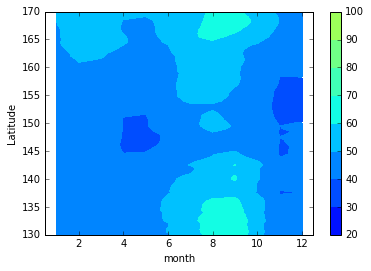

In [22]:
#plt.errorbar(np.arange(1,13,1), mld_kuro, yerr=mld_std, color='k')
# plt.plot(5, mld_kuro[4],'ro', 9, mld_kuro[8],'ro')
# plt.plot(7, mld_kuro[6],'bo')

plt.contourf(np.arange(1,13,1), lons, mld_kuro, vmin = 0, vmax = 175)
plt.axis([0.5, 12.5, 130, 170])
plt.colorbar()
plt.xlabel('month')
plt.ylabel('Latitude')
plt.show()

In [18]:
print mld_kuro[4], mld_kuro[6],mld_kuro[8]
print mld_std[4], mld_std[6],mld_std[8]


 28.9811183956 17.1176507398 22.0673441017
6.6858792693 2.23562396033 3.31642759604


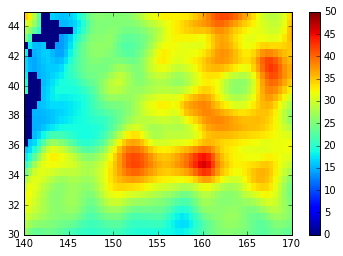

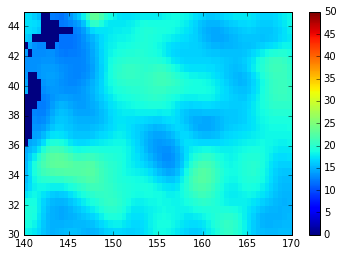

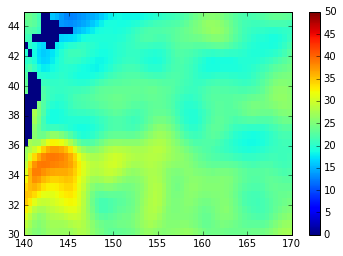

In [7]:
plt.pcolor(lon,lat,mld[:,:,4], vmin=0, vmax=50)
plt.axis([140, 170, 30, 45])
plt.colorbar()
plt.show()

plt.pcolor(lon,lat,mld[:,:,6], vmin=0, vmax=50)
plt.axis([140, 170, 30, 45])
plt.colorbar()
plt.show()

plt.pcolor(lon,lat,mld[:,:,8], vmin=0, vmax=50)
plt.axis([140, 170, 30, 45])
plt.colorbar()
plt.show()